# **Import Necessary libraries**

In [101]:
!pip install apyori

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import the dataset**

In [90]:
# reading the dataset

df = pd.read_csv('Market_Basket_Analysis.csv',header = None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7491,herb & pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7492,chocolate,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7493,burgers,salmon,pancakes,french fries,frozen smoothie,fresh bread,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7494,turkey,burgers,dessert wine,shrimp,pasta,tomatoes,pepper,milk,pancakes,whole wheat rice,oil,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7495,pancakes,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df.sample(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4527,spaghetti,mineral water,avocado,strawberries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4905,whole wheat pasta,spaghetti,milk,olive oil,chocolate,brownies,melons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2989,eggs,carrots,green tea,chocolate,mushroom cream sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2119,milk,cake,cookies,mushroom cream sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7173,mineral water,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,eggs,french fries,energy drink,light mayo,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1019,turkey,herb & pepper,frozen vegetables,tomatoes,chocolate,milk,clothes accessories,cottage cheese,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,turkey,mineral water,milk,pancakes,whole wheat rice,cooking oil,frozen smoothie,cookies,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5817,chocolate,french fries,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
print(df.shape)

(7501, 20)


In [94]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1




# **Data Summarization**

In [95]:
# Create a list of transactions from the first 20 columns of the DataFrame
trans = [[str(df.iloc[i,j]) for j in range(20)] for i in range(len(df))]

# Convert the list to a numpy array
trans = np.array(trans)

# Print the shape and contents of the array
print(trans.shape)
print(trans[:10])


(7501, 20)
[['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
  'whole weat flour' 'yams' 'cottage cheese' 'energy drink'
  'tomato juice' 'low fat yogurt' 'green tea' 'honey' 'salad'
  'mineral water' 'salmon' 'antioxydant juice' 'frozen smoothie'
  'spinach' 'olive oil']
 ['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pa

# **Graphical Representations**

In [96]:
import plotly.express as px

# Retrieve top 20 most popular items
top_item = df[0].value_counts().head(15)

# Create a horizontal bar chart with color scale
fig = px.bar(top_item, x=top_item.values, y=top_item.index, orientation='h', color=top_item.values, color_continuous_scale='RdBu')

# Add chart title and axis labels
fig.update_layout(title='Bestselling products', xaxis_title='Number of Occurrences', yaxis_title='Item Name', yaxis=dict(autorange="reversed"))

# Show the plot
fig.show()


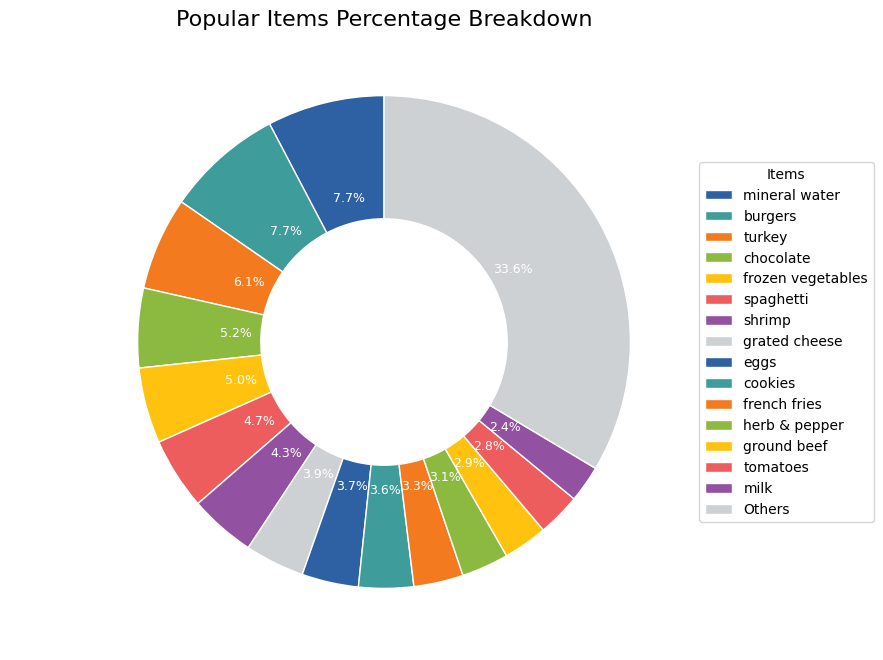

In [97]:
top_items = df[0].value_counts().head(15)
others_count = len(df[0]) - top_items.sum()
top_items['Others'] = others_count

fig, ax = plt.subplots(figsize=(8, 8))
# create pie chart
wedges, texts, autotexts = ax.pie(top_items.values, labels=top_items.index, startangle=90, 
                                  wedgeprops={'width': 0.5, 'edgecolor': 'w'}, autopct='%1.1f%%',
                                  textprops={'fontsize': 9, 'color': 'w'})

# set colors for each wedge
colors = ['#2D61A4', '#3E9C9B', '#F47A1F', '#8CBA41', '#FFC20E', '#ED5D5D', '#9251A1', '#CDD1D3']
for i, wedge in enumerate(wedges):
    wedge.set_facecolor(colors[i % len(colors)])

# add legend and title
ax.legend(wedges, top_items.index, title='Items', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Popular Items Percentage Breakdown', fontsize=16)

plt.show()

# Add a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add percentage labels to the chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    percentage = float(autotext.get_text().strip('%'))
    if percentage < 5:
        autotext.set_text('')
    else:
        autotext.set_text('{:.1f}%'.format(percentage))

plt.show()


In [98]:

# Create a dictionary to store the item counts
item_counts = {}
for transaction in trans:
    for item in transaction:
        if item in item_counts:
            item_counts[item] += 1
        else:
            item_counts[item] = 1

# Create a co-occurrence matrix with unique pairs
co_occurrence_matrix = np.zeros((len(item_counts), len(item_counts)))
for transaction in trans:
    for i in range(len(transaction)):
        for j in range(i+1, len(transaction)):
            item1 = transaction[i]
            item2 = transaction[j]
            if item1 in item_counts and item2 in item_counts:
                index1 = list(item_counts.keys()).index(item1)
                index2 = list(item_counts.keys()).index(item2)
                co_occurrence_matrix[index1, index2] += 1

# Find the top 10 pairs of items that appear together most frequently
item_indices = np.argsort(-co_occurrence_matrix, axis=None)[:20]
n_items = len(item_counts)
top_pairs = []
for index in item_indices:
    i = index // n_items
    j = index % n_items
    if i != j and co_occurrence_matrix[i, j] > 0:
        item1 = list(item_counts.keys())[i]
        item2 = list(item_counts.keys())[j]
        if (item2, item1) not in top_pairs:
            top_pairs.append((item1, item2, co_occurrence_matrix[i, j]))

# Print the top pairs
for pair in top_pairs:
    print(pair[0], "and", pair[1], "appear together", pair[2], "times")


mineral water and nan appear together 25383.0 times
eggs and nan appear together 19896.0 times
french fries and nan appear together 19103.0 times
spaghetti and nan appear together 17817.0 times
chocolate and nan appear together 17588.0 times
green tea and nan appear together 14237.0 times
milk and nan appear together 13197.0 times
cookies and nan appear together 9989.0 times
ground beef and nan appear together 9780.0 times
pancakes and nan appear together 9705.0 times
frozen vegetables and nan appear together 9592.0 times
escalope and nan appear together 9131.0 times
burgers and nan appear together 9042.0 times
cake and nan appear together 8628.0 times
low fat yogurt and nan appear together 8317.0 times
shrimp and nan appear together 7195.0 times
tomatoes and nan appear together 6933.0 times
olive oil and nan appear together 6515.0 times
turkey and nan appear together 6436.0 times


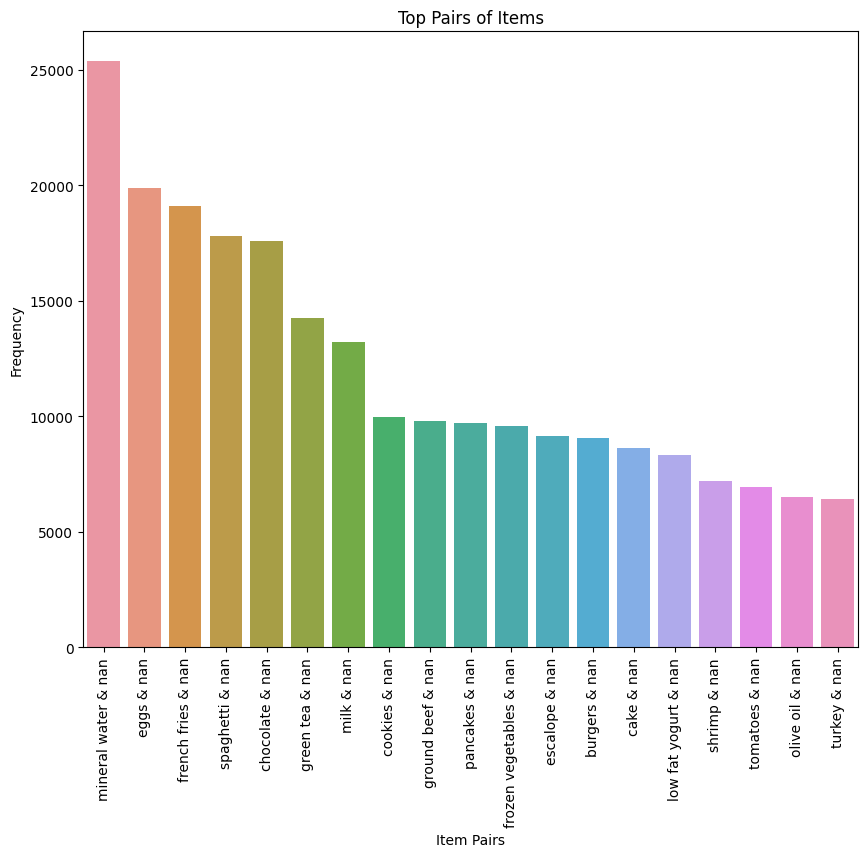

In [99]:
import seaborn as sns

# Create a list of item pairs and their frequency
items = []
frequencies = []
for pair in top_pairs:
    items.append(pair[0] + " & " + pair[1])
    frequencies.append(pair[2])

# Create a bar chart with pastel color palette
plt.figure(figsize=(10, 8))
sns.set_palette("pastel")
sns.barplot(x=items, y=frequencies)
plt.xticks(rotation=90)
plt.title("Top Pairs of Items")
plt.xlabel("Item Pairs")
plt.ylabel("Frequency")
plt.show()


# **Model Training**

In [100]:
trans = list(trans)
rules = apriori(trans, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)

for rule in results:
    print("Rule: " + str(rule.items))
    print("Support: " + str(rule.support))
    print("Confidence: " + str(rule.ordered_statistics[0].confidence))
    print("Lift: " + str(rule.ordered_statistics[0].lift))
    print("=====================================")


Rule: frozenset({'light cream', 'chicken'})
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: frozenset({'mushroom cream sauce', 'escalope'})
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: frozenset({'pasta', 'escalope'})
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: frozenset({'honey', 'fromage blanc'})
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: frozenset({'herb & pepper', 'ground beef'})
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: frozenset({'ground beef', 'tomato sauce'})
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: frozenset({'olive oil', 'light cream'})
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573
Rule: frozenset({'olive oil', 'whole wheat pasta'})
Support: 0.0079989334755